# **b) Dimensionality Reduction Techniques on Image Data**

Digits dataset is a image dataset of handwritten digit having 1797 8×8 images

Import libraries and load dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data
data.shape

(1797, 64)

Taking a sample image to view

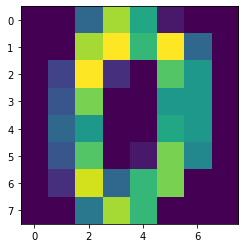

In [2]:
#image is in the form of numpy array.
image_sample = data[0, :].reshape(8, 8)
plt.imshow(image_sample)

# **1) PCA - Principal Component Analysis**

Reduce Image Dimensions

The data gets reduced from (1797, 64) to (1797, 2)

In [3]:
from sklearn.decomposition import PCA
 
pca_2 = PCA(2) # we need 2 principal components.
converted_data = pca_2.fit_transform(digits.data)
 
converted_data.shape

(1797, 2)

Visualize the Resulting Dataset

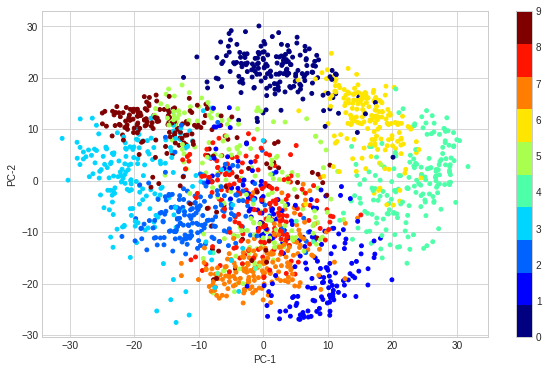

In [4]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [5]:
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_2.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  28.509364823697588


In [6]:
from sklearn.decomposition import PCA
 
pca_64 = PCA(64) 
converted_data = pca_64.fit_transform(digits.data)
 
converted_data.shape

(1797, 64)

In [7]:
print('Variance explained by the First PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[63])

Variance explained by the First PCs =  14.890593584063867
Variance explained by the First 2 PCs =  28.509364823699343
Variance explained by the First 5 PCs =  54.49635267268983
Variance explained by the First 10 PCs =  100.00000000000004


Reference: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

# **2) SVD - Single Value Decomposition**

In [8]:
from sklearn.decomposition import TruncatedSVD

trun_svd =  TruncatedSVD(n_components = 63)
A_transformed = trun_svd.fit_transform(data)


In [9]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(A_transformed[:2])

Transformed Matrix:
[[ 4.58612772e+01 -1.19211574e+00  2.11000593e+01 -9.48896828e+00
   1.30431227e+01 -7.01649199e+00 -8.96007911e+00  3.96723010e-01
   1.30962289e+00 -1.39044802e+00  1.05130971e+00  2.69234781e+00
  -2.59969259e+00 -2.06434074e+00 -2.26130810e+00 -6.24508973e-01
   4.01141371e+00 -2.04363603e+00  4.66278059e-01  2.03151770e+00
  -4.19570841e+00  6.86232741e-01  2.20092567e+00  1.21377483e+00
   1.29503746e+00  1.97156387e+00  3.78333233e+00 -1.27411917e+00
  -1.19381735e+00  2.33105516e+00 -1.74566737e+00 -9.61813813e-01
   2.21633919e-01 -2.10561875e+00  1.23034772e+00  2.07176023e-01
  -4.08138478e-02 -2.77637672e+00  1.08339635e+00  2.79603567e-01
   1.68768446e+00  5.51928986e-01  7.97241808e-01 -2.10694261e-01
   6.49584722e-01 -6.12073115e-01  4.40027180e-02 -7.05252158e-01
  -2.84711495e-01  2.43713250e-02 -4.15566069e-01 -1.18903159e-01
  -8.23582589e-02 -5.89373514e-02 -4.92009404e-02 -3.46634408e-03
   8.23838585e-03  8.45370111e-04  7.43064883e-03  1.963

In [10]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[62])

Variance explained by the First PCs =  2.8708507746387513
Variance explained by the First 2 PCs =  17.760900853994002
Variance explained by the First 5 PCs =  51.52668963786018
Variance explained by the First 10 PCs =  100.00000000000016


In [11]:
from sklearn.decomposition import TruncatedSVD

trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(data)

In [12]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(A_transformed[:10])

Transformed Matrix:
[[ 45.86127719  -1.19210214]
 [ 55.52967927   7.86129312]
 [ 55.8278837    6.914873  ]
 [ 45.13574478 -15.88930601]
 [ 40.74225609  23.36785437]
 [ 58.06065913 -14.14487748]
 [ 53.13759473  21.32481255]
 [ 43.11987603  -2.93581671]
 [ 59.95875562  -5.34022499]
 [ 55.63415709  -5.51081862]]


In [13]:
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  17.760900855938562


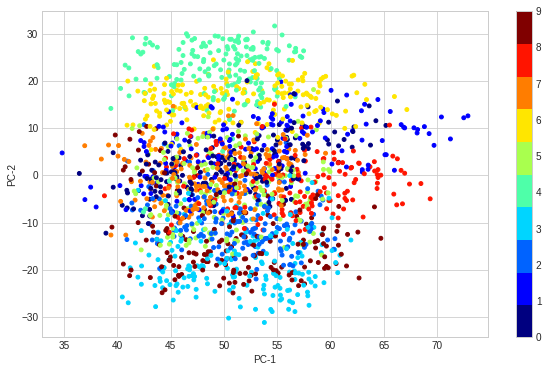

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(A_transformed[:, 0], A_transformed[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

# **3) LLE - Locally Linear Embedding**

In [15]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(data)


In [16]:
X_transformed.shape

(1797, 2)

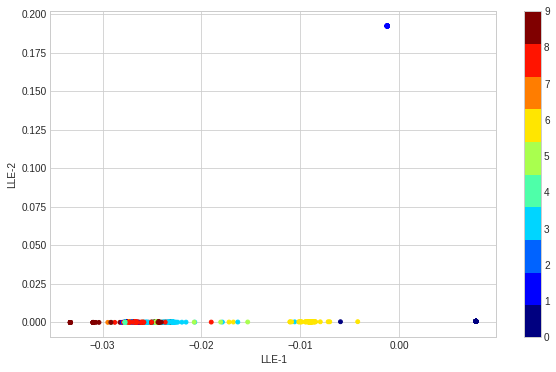

In [17]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [18]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(data)

In [ ]:
X_embedded.shape

(1797, 2)

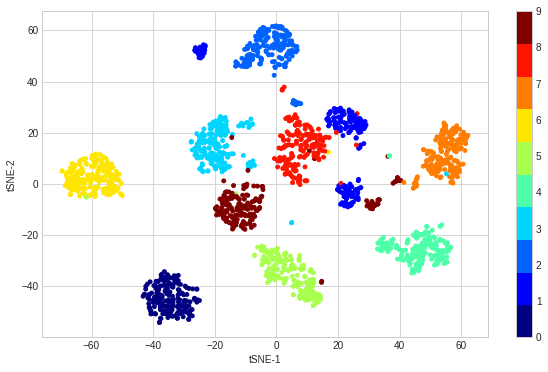

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

# **5) ISOMAP - Isometric Mapping**

In [20]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components = 2)
X_transformed = embedding.fit_transform(data)


In [21]:
X_transformed.shape

(1797, 2)

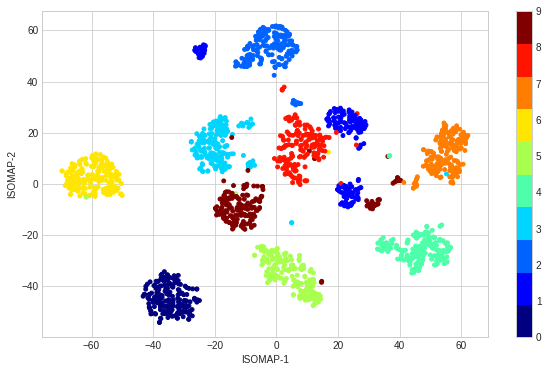

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

# **6) UMAP**

In [23]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=26c2efb4a37432c0eb1f3488a95eabfd83949d8d939e1027262f05d82dce8f5c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=1e6a0466f8d59b6a7e2e46009ff1fd0327cd3194bf5ed7fdc84f74f3fe74a3c1
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [24]:
import umap
import pandas as pd

In [26]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'Embedding by UMAP')

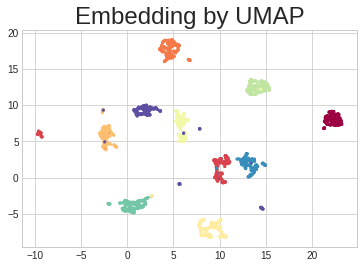

In [27]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = digits.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

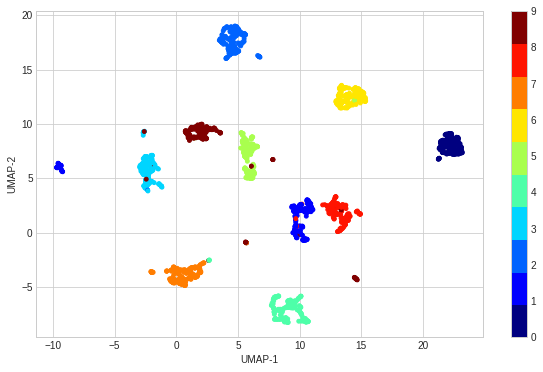

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

# **Plots of all techniques**

In [30]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA



LLE: 1.1 sec
t-SNE: 12 sec
UMAP: 7.7 sec
ISOMAP: 1.9 sec
SVD: 0.015 sec
PCA: 0.011 sec


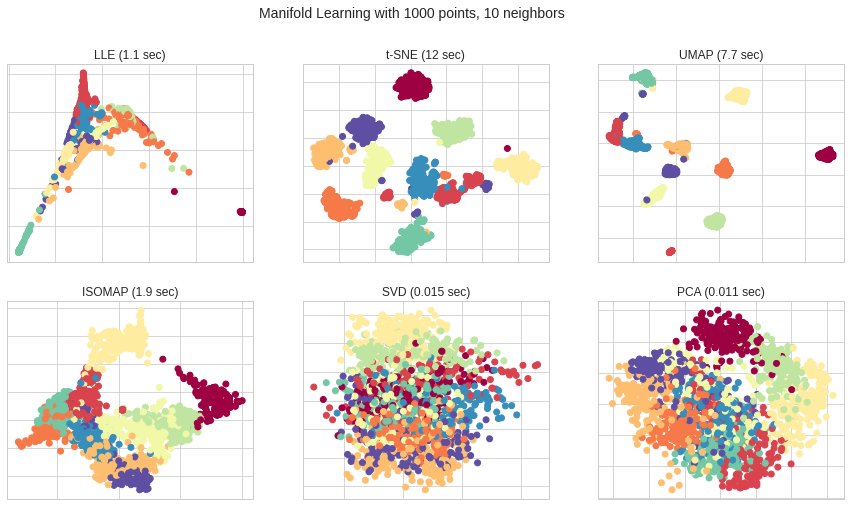

In [32]:
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(random_state=42)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(data)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=digits.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

**Here, for the given dataset tSNE and UMAP is the best one among all six techniques because more number of datapoints are seperable.**